In [1]:
import numpy as np
import matplotlib.pyplot as plt

At its core, simple linear regression assumes that the data is generated by a process like:

$$
Y = \beta_0 + \beta_1 X_1 + \epsilon
$$

Where:

- **$Y$** is the **target variable** (the value we want to predict/infer).
- **$X_1$** is the **predictor variable** (the input feature).
- **$\beta_0$** is the **intercept**, representing the baseline value of $Y$ when $X_1 = 0$.
- **$\beta_1$** is the **coefficient**, representing the effect of $X_1$ on $Y$ (how much $Y$ changes for a one-unit change in $X_1$).
- **$\epsilon$** is the **error term**, capturing the variability not explained by the model.


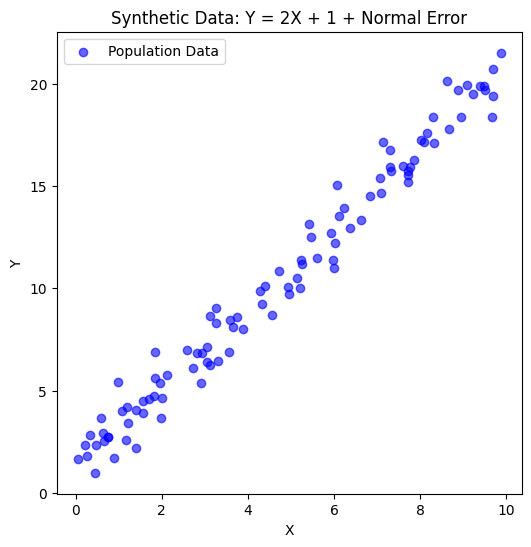

In [2]:
np.random.seed(42)

X = np.random.uniform(0, 10, 100)  # 100 random values between 0 and 10

epsilon = np.random.normal(0, 1, 100)

Y = 2 * X + 1 + epsilon

plt.figure(figsize=(6, 6))
plt.scatter(X, Y, label="Population Data", color="blue", alpha=0.6)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Synthetic Data: Y = 2X + 1 + Normal Error")
plt.legend()
plt.show()

So we produce a model for the data like:

$$
\hat{y} =  \beta_0 + \beta_1x
$$

The value that linear regression aims to minimise is the residual sum of squares
$$
RSS = \sum_i^n (y_i- \hat{y_i})^2
$$

Where
- $y_i$ is our known sample value at data point $i$
- $\hat{y_i}$ is the regression value at data point $i$

The optimal estimates for $\beta_0$ and $\beta_1$ are as follows:

* $\hat{\beta}_1 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2}$
* $\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}$

In [3]:
# IRL we don't have a population, we get a sample of observed data
sample_indices = np.random.choice(len(X), size=50, replace=False)
x_sample = X[sample_indices]
y_sample = Y[sample_indices]

x_mean = np.mean(X)
y_mean = np.mean(Y)

beta_1 = np.sum((x_sample - x_mean) * (y_sample - y_mean)) / np.sum((x_sample - x_mean) ** 2)

beta_0 = y_mean - (beta_1 * x_mean)

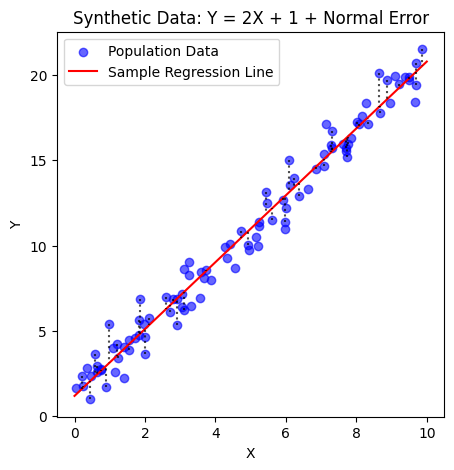

In [4]:
x_domain = np.linspace(0, 10, 100)

y_hat = (x_domain * beta_1) + beta_0

y_hat_known = (x_sample * beta_1) + beta_0

residuals = y_sample - y_hat_known

plt.figure(figsize=(5, 5))
plt.scatter(X, Y, label="Population Data", color="blue", alpha=0.6)
plt.plot(x_domain, y_hat, label="Sample Regression Line", color="red")
for i in range(len(x_sample)):
    plt.plot([x_sample[i], x_sample[i]], [y_sample[i], y_hat_known[i]], color="black", linestyle="dotted", alpha=0.7)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Synthetic Data: Y = 2X + 1 + Normal Error")
plt.legend()
plt.show()

In [5]:
print("beta_0 ", beta_0)
print("beta_1 ", beta_1)

beta_0  1.179723931406775
beta_1  1.961545789758409


Something interesting, however, is that even if we did know the 'perfect' coefficients we'd still have an error value. So, the residuals from our model are technically estimates of the 'true' error terms $\epsilon$

In [6]:
rss = np.sum((y_hat_known - y_sample)**2)
print(rss)

44.031439809809505


The residual standard error is an estimate of how much our regression will deviate from the true line. It is a measure of goodness of fit:

$$
RSE = \sqrt{\frac{1}{n-2}RSS}
$$

The $-2$ term is an artefact produced by the fact that we are using estimation.

In [7]:
rse = np.sqrt((1/(len(x_sample) - 2) )* rss)
print(rse)

0.9577691071987886


Now, RSE is great, but it is quoted in the units of the Y variable, so it is hard to judge how big is 'too big'. What would be great is if we had a more definitive and easy to interpret measure... This is where the $R^2$ statistic comes in:

$$
R^2 = \frac{TSS - RSS}{TSS}
$$

Where:
- $TSS = \sum{(y_i - \bar{y})^2}$ is the 'total sum of squares'
- $RSS$ is the residual sum of squares

Who cares about $TSS$? Well, it measures the total variance in $y$ - it's basically how much variance exists in the target variable before any regression is done. So what we're measuring is the variance minus the deviation of our model from the data ($RSS$) divided by the total variance.

**Thus $R^2$ is the total proportion of the variance explained by the regression!**

If $R^2$ is equal to 0 this means that none of the variance is explained by the regression, but if $R^2$ is 1 it means all of the variance is explained by the regression.

In [8]:
tss = np.sum((y_sample - y_mean)**2)

r_squared = (tss - rss)/tss

print(r_squared)

0.9776663879219665


## Multiple Linear Regression

Multiple linear regression is an extension of simple linear regression by adding more predictor variables. So we assume that our data is generated by a process like:

$$
Y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_px_p + \epsilon
$$

The model we use is no longer a regression 'line' but rather a regression plane with p dimensions.

We can estimate the regression coefficients $\bold{\beta}$ using the **Normal Equation**:

$$
\beta = (X^T X)^{-1} X^T Y
$$

Where:
- $ X $ is the **design matrix**, containing the predictor variables and a column of ones for the intercept.
- $ Y $ is the **target variable vector**.
- $ \beta $ is the **coefficient vector**, which we aim to compute.

For example multiple regression with two predictors:

$$
Y = \beta X + \epsilon
$$

The **design matrix** $ X $ includes a column of ones for the intercept term:

$$
X =
\begin{bmatrix}
1 & X_{1,1} & X_{1,2} \\
1 & X_{2,1} & X_{2,2} \\
1 & X_{3,1} & X_{3,2} \\
\vdots & \vdots & \vdots \\
1 & X_{n,1} & X_{n,2}
\end{bmatrix}
$$

where:
- $ n $ is the number of observations.
- $ X_{i,1} $ and $ X_{i,2} $ are the values of the two predictor variables for each observation.


In [9]:
%matplotlib qt

X1 = np.random.uniform(0, 10, 100)
X2 = np.random.uniform(0, 10, 100)

epsilon = np.random.normal(0, 5, 100)

Y = 1 + 2 * X1 + 3 * X2 + epsilon

X = np.column_stack((np.ones(len(X1)), X1, X2))

beta_hat = np.linalg.inv(X.T @ X) @ X.T @ Y

beta_0, beta_1, beta_2 = beta_hat

print(f"Manually Computed Coefficients:")
print(f"Intercept (beta_0): {beta_0:.3f}")
print(f"Coefficient for X1 (beta_1): {beta_1:.3f}")
print(f"Coefficient for X2 (beta_2): {beta_2:.3f}")

Y_pred = X @ beta_hat

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X1, X2, Y, color="blue", label="Observed Data", alpha=0.6)

X1_grid, X2_grid = np.meshgrid(np.linspace(0, 10, 10), np.linspace(0, 10, 10))
Y_grid = beta_0 + beta_1 * X1_grid + beta_2 * X2_grid 

ax.plot_surface(X1_grid, X2_grid, Y_grid, color='red', alpha=0.5)

ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("Y")
ax.set_title("Multiple Linear Regression Plane")

plt.legend()
plt.show(block=True)

Manually Computed Coefficients:
Intercept (beta_0): 3.246
Coefficient for X1 (beta_1): 1.609
Coefficient for X2 (beta_2): 2.924


Defintions for $RSS$, $RSE$, $TSS$ and $R^2$ extend naturally to the multiple linear regression case